## Домашнее задание
### Задача 1

О непрерывной равномерно распределённой случайной величине B известно, что её дисперсия равна 0.2. Можно ли найти правую границу величины B и её среднее значение зная, что левая граница равна 0.5? Если да, найдите их.

In [25]:
import math
#D = ((b-a)**2)/12
D = 0.2
a = 0.5
b = math.sqrt(D*12) + a
b


2.049193338482967

In [26]:
M = (a+b)/2
M

1.2745966692414834

### Задача 2

Коробки с шоколадом упаковываются автоматически. Их средняя масса равна 1.06 кг. Известно, что 5% коробок имеют массу, меньшую 1 кг. Найдите: а) среднее квадратическое отклонение массы коробки, б) процент коробок, имеющих массу больше 1.1 кг.

Подсказка. Найдите такое значение scale, для которого значение cdf(x=1, loc=1.06, scale=scale) близко к 0.05. Точности 0.0001 будет достаточно.

In [27]:
import numpy as np 
from scipy.special import erf
from scipy.stats import norm
loc = 1.06

In [28]:
def cdf_normal(loc, scale, x):
    return (1 + erf((x-loc)/(scale*np.sqrt(2))))/2

In [29]:
def find_sigma(loc, x, iter=10000):
    for s  in range(1,iter):
        f = cdf_normal(loc, s/iter, x)
        if f >= 0.05: 
            break
    return s/iter

In [30]:
scale  = find_sigma(loc = loc, x = 1)
scale

0.0365

In [31]:
samples = np.random.normal(loc, scale, size =1000)

In [32]:
def pdf_normal(loc, scale, x):
    return np.exp(-((x-loc)**2)/(2*scale**2))/(scale*np.sqrt(2*np.pi))

In [33]:
samples.mean(), samples.var(ddof =1 )

(1.0594347074233799, 0.0013210497114969411)

In [34]:
ox = np.linspace(loc-3*scale,loc+3*scale,100)

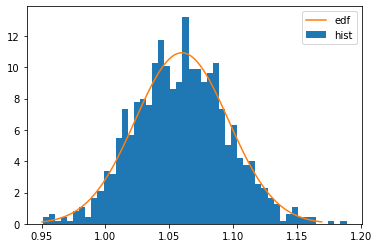

In [35]:
import matplotlib.pyplot as plt
plt.hist(samples, bins=50, density = True, label = 'hist')
oy = np.array([(cdf_normal(loc, scale,x+0.0001)-cdf_normal(loc, scale,x))/0.0001 for x in ox])
plt.plot(ox, oy, label  = 'edf')
plt.legend()
plt.show()

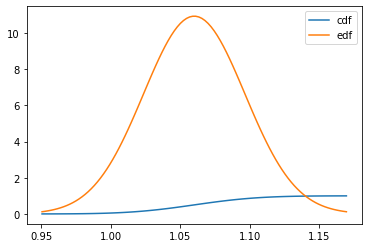

In [36]:
oy1 = np.array([cdf_normal(loc, scale,x) for x in ox])
oy3 = np.array([norm.pdf(x, loc, scale) for x in ox])
plt.plot(ox, oy1, label = 'cdf')
plt.plot(ox, oy3, label  = 'edf')
plt.legend()
plt.show()

In [37]:
a=cdf_normal(loc, scale, 1.1)
print(100-a*100, '%')

13.65633679744775 %


### Задача 3

Коробка содержит 30 конфет. Известно, что масса каждой конфеты распределена равномерно в промежутке от 12 до 14 граммов. Используя центральную предельную теорему, найти вероятность, что масса всей коробки будет: а) меньше 390 граммов, б) больше 395 граммов, в) от 380 до 400 граммов.

Массой самой коробки можно пренебречь.

In [14]:
from scipy.stats import norm

In [15]:
m1 = 12  
m2 = 14
n =30
mu = (m1+m2)/2*n
mu

390.0

In [16]:
D = ((m2-m1)**2)/12
D

0.3333333333333333

In [17]:
sigma = np.sqrt(D*n)
sigma

3.1622776601683795

In [18]:
p1 = norm.cdf(390, loc=mu, scale=sigma)
print('меньше 390 граммов', p1)

меньше 390 граммов 0.5


In [19]:
p2 = 1-norm.cdf(395, loc=mu, scale=sigma)

In [20]:
print('больше 395 граммов', p2)

больше 395 граммов 0.056923149003329065


In [21]:
p3 = norm.cdf(400, loc=mu, scale=sigma) - norm.cdf(380, loc=mu, scale=sigma)
print('от 380 до 400 граммов', p3)

от 380 до 400 граммов 0.9984345977419975


In [22]:
ox = np.linspace(mu-3*sigma,mu+3*sigma,100)

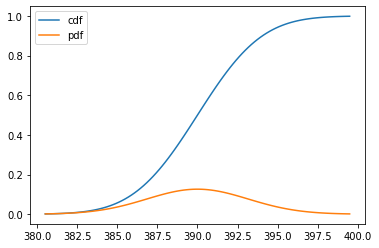

In [23]:
plt.plot(ox, [norm.cdf(x, mu, sigma) for x in ox], label  = 'cdf')
plt.plot(ox, [norm.pdf(x, mu, sigma) for x in ox], label  = 'pdf')
plt.legend()
plt.show()